# Redes neuronales convolucionales para clasificación

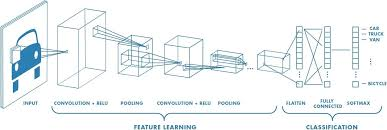

In [108]:
# Importar las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import torch
import torch.nn as nn
import torch.optim as optim

# O la opcion de keras
import keras

In [109]:
# Carga el dataset mnist con numeros manuscritos
# Pista: documentacion oficial de keras
# mnist = fetch_openml("mnist_784", version=1, parser="auto")

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Podemos omitir la conversion a `float32` si el escalado lo hacemos de la forma `X_train = X_train / 255.0` (De esta forma se realiza la conversion de forma automatica)

In [110]:
# Convertir cada pixel en float32 tanto las imagenes de entrenamiento como las de prueba
# X_train = X_train.astype(np.float32)
# X_test = X_test.astype(np.float32)
# y_train = y_train.astype(np.float32)
# y_test = y_test.astype(np.float32)

In [111]:
X_test[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  61,   3,
         42, 118, 193, 118, 118,  61,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14, 179, 245, 236,
        242, 254, 254, 254, 254, 245, 235,  84,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [112]:
# Escala el valor de los pixeles como se mostro en la presentacion
# Deben quedarse con valores entre 0 y 1
# Y, al mismo tiempo, se pasa de uint8 a float32
X_train = X_train / 255.0
X_test = X_test / 255.0

In [113]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

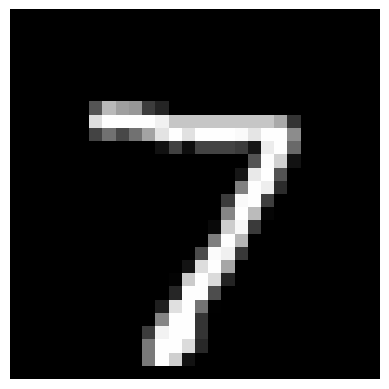

In [114]:
plt.imshow(X_test[0], cmap="grey")
plt.axis("off")
plt.show()

In [115]:
# Mostrar la categoria a la que pertenece esta primera imagen 
y_test[0]

7

In [116]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [117]:
# Convierte las etiquetas (tanto en entrenamiento como en prueba, y_train e y_test, en categorias one-hot)
# Pista: documentacion oficial de keras
y_train = keras.utils.to_categorical(y_train, num_classes=len(np.unique(y_train)))
y_test = keras.utils.to_categorical(y_test, num_classes=len(np.unique(y_test)))

In [118]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [119]:
# Define el modelo
model = keras.models.Sequential()

Vamos a añadir una capa de convolucion 2D con las siguientes caracteristicas:

- $32$ filtros (mapas de características).
- El tamaño del kernel (filtro) de convolución es de $3x3$.
- Valores mas grandes permite que la red abarque más en la imágen de entrada.
- Valores mas pequeños permiten que la red tenga un enfoque más detallado.
- *ReLu* como función de activación.
- Las imágenes son de 28x28 con un solo canal de color.

In [120]:
model.add(keras.Input(shape=(28, 28, 1), name="Input_Layer"))

In [121]:
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", name="Convolution_Layer"))

Añadiremos una capa de pooling para reducir la dimensionalidad.


In [122]:
model.add(keras.layers.MaxPooling2D(2, 2, name="Max_Pooling_Layer"))

Convertimos los datos de 2 dimensiones a 1 dimensión.

In [123]:
model.add(keras.layers.Flatten(name="Flatten_Layer"))

Añadimos dos capas densas.

In [124]:
model.add(keras.layers.Dense(64, activation="relu", name="Dense_Layer_1"))
model.add(keras.layers.Dense(10, activation="softmax", name="Output_Layer")) # 10 salidas que serian los 10 digitos esperados

In [125]:
# Resumen del modelo
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Convolution_Layer (Conv2D)      │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max_Pooling_Layer               │ (None, 13, 13, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten_Layer (Flatten)         │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_1 (Dense)           │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [126]:
# Compila el modelo con el optimizador Adam, la funcion de perdida Categorical Cross Entropy y la metrica Accuracy

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [127]:
# Entrena el modelo con 5 iteracciones y tamaño de lote de 32
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8982 - loss: 0.3391
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9795 - loss: 0.0655
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9874 - loss: 0.0414
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9912 - loss: 0.0288
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9939 - loss: 0.0201


In [128]:
# Evalua el rendimiento del modelo (porcentaje de acierto)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en los datos de prueba: {test_acc * 100:.2f}%")

Precisión en los datos de prueba: 98.64%


In [129]:
# Hacer una prediccion con los datos de prueba
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [130]:
predictions[0]

array([5.9188676e-10, 1.7502964e-08, 7.7684838e-08, 3.7765869e-08,
       6.9707426e-09, 8.3911935e-09, 7.2626537e-16, 9.9999964e-01,
       1.4409168e-08, 1.8862056e-07], dtype=float32)

In [131]:
y_true = y_test.argmax(axis=1)
y_pred = predictions.argmax(axis=1)

In [132]:
y_true, y_pred

(array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64))

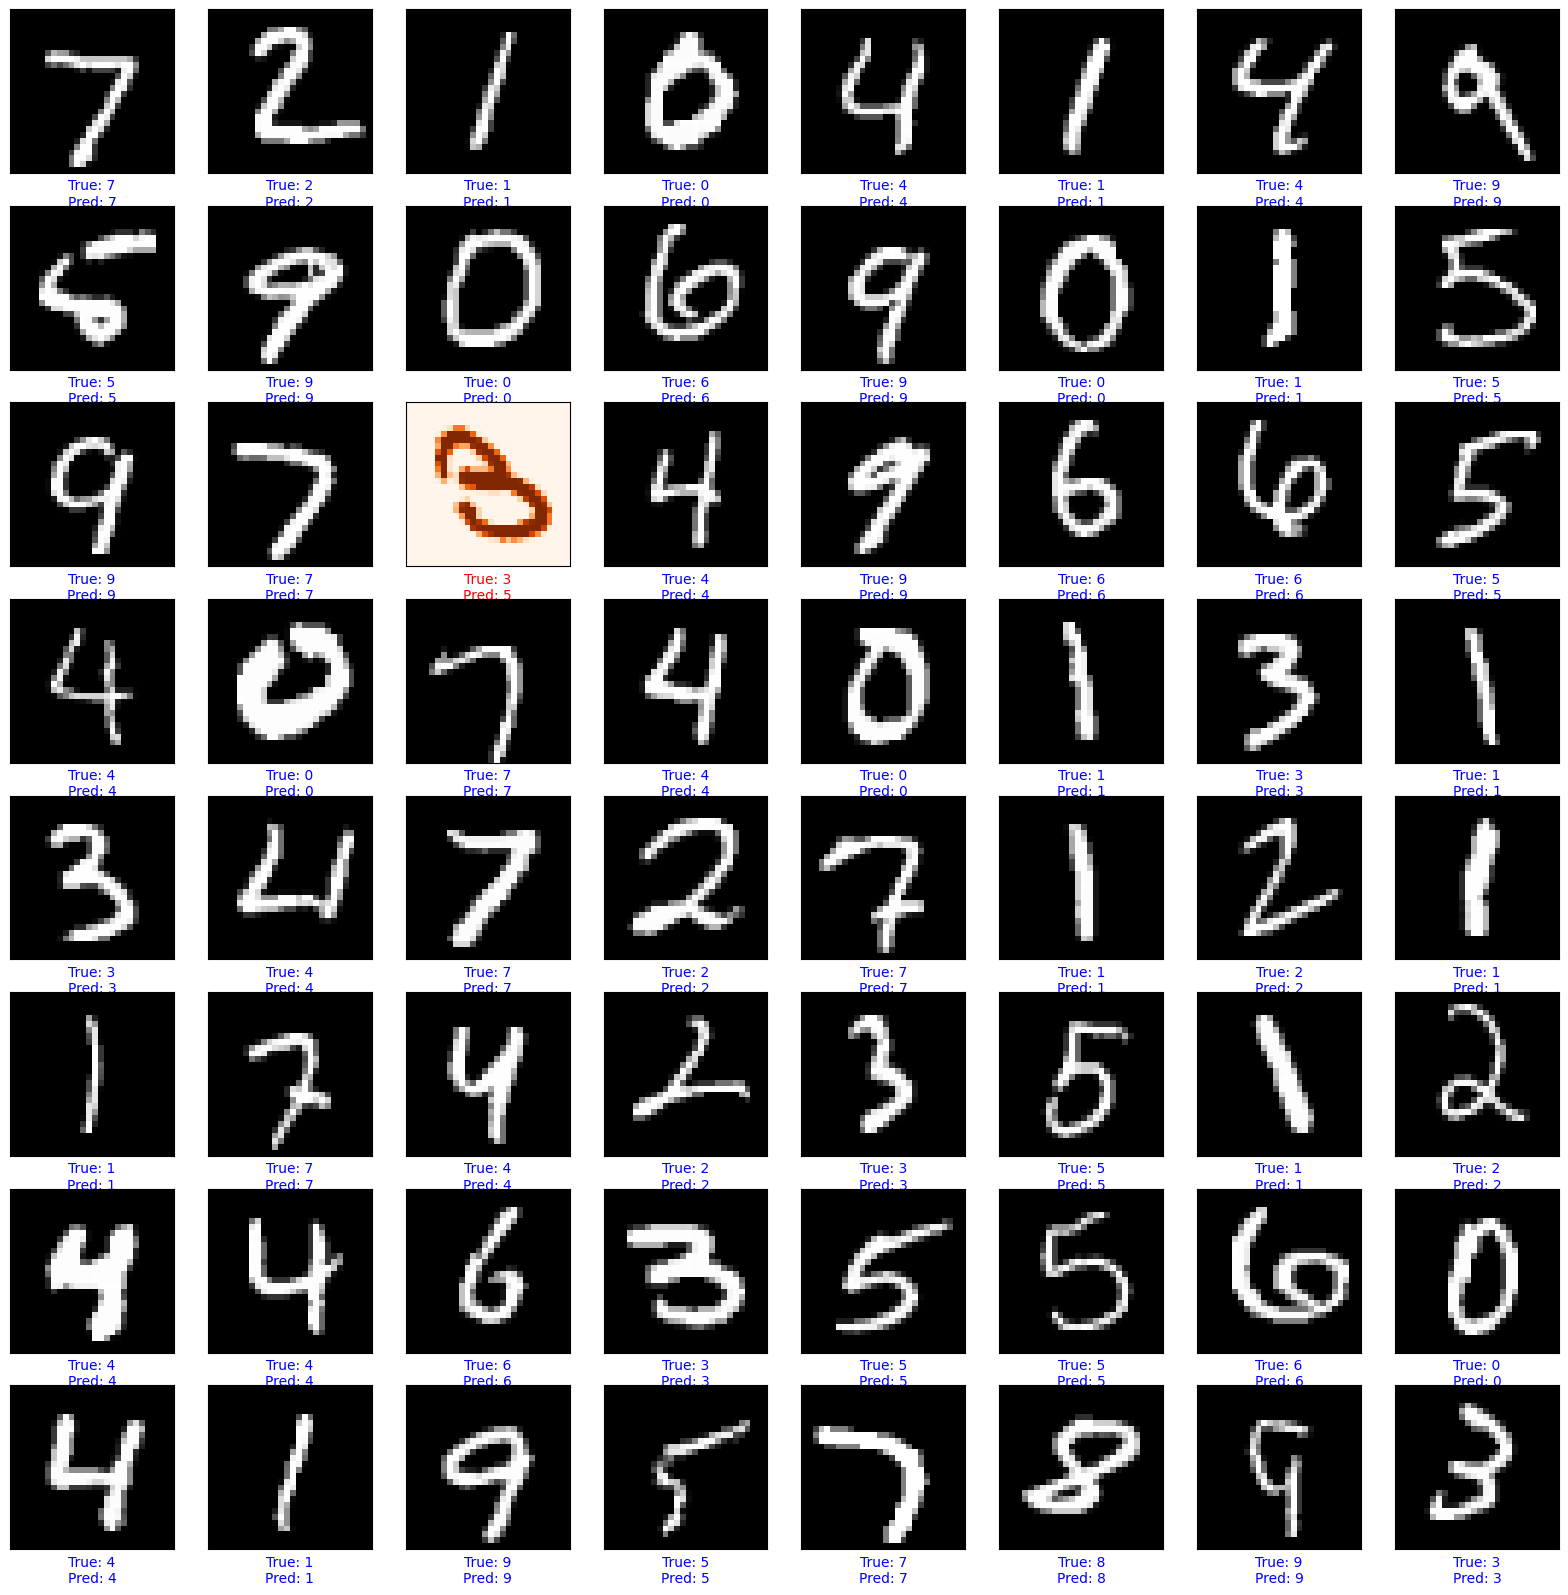

In [147]:
plt.figure(figsize=(20, 20))
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.xticks([])
    plt.yticks([])
    cmap_image = "gray" if y_true[i] == y_pred[i] else "Oranges"
    plt.imshow(X_test[i], cmap=cmap_image)
    c = "blue" if y_true[i] == y_pred[i] else "red"
    plt.xlabel(f"True: {y_true[i]}\nPred: {y_pred[i]}", color=c)
plt.show()